Problem Statement: Developing an End-to-End Credit Scorecard Using Machine Learning

In the financial industry, assessing the creditworthiness of individuals is a critical process for making informed lending decisions. Traditional credit scoring models often rely on a fixed set of rules and may not capture the complexity of individual financial situations. This project aims to build an end-to-end credit scorecard using machine learning, providing a more accurate and dynamic approach to evaluating credit risk.

Objectives:

Data Collection:

Gather relevant financial data from diverse sources, including income, debt, payment history, and other factors that influence creditworthiness.
Data Preprocessing:

Clean and preprocess the collected data, addressing missing values, outliers, and any inconsistencies. Perform feature engineering to extract meaningful information from raw data.
Exploratory Data Analysis (EDA):

Conduct an in-depth exploratory analysis to understand the distribution of variables, identify patterns, and gain insights into the relationships between features and credit outcomes.
Model Selection:

Choose appropriate machine learning algorithms for credit scoring. Compare the performance of different models such as logistic regression, decision trees, and ensemble methods to determine the most suitable approach.
Model Training:

Train the selected machine learning model(s) using historical credit data. Optimize model parameters to improve predictive accuracy and generalization to new, unseen data.
Evaluation Metrics:

Define evaluation metrics for assessing the performance of the credit scorecard. Common metrics include accuracy, precision, recall, and the area under the receiver operating characteristic (ROC) curve.
Interpretability and Explainability:

Ensure the developed credit scorecard is interpretable and explainable. Understand the factors contributing to credit decisions and provide transparency to users.
Web Application Development:

Create a user-friendly web application using a framework like Flask. The application should allow users to input relevant financial information and receive a credit score prediction based on the trained model.
Deployment:

Deploy the web application on a hosting platform to make it accessible to users. Ensure scalability and security considerations are addressed during the deployment process.
Documentation:

Provide comprehensive documentation for the end-to-end process, including data sources, preprocessing steps, model development, and how to use the web application. The documentation should serve as a guide for future updates and improvements.
Expected Outcomes:

A robust credit scorecard model capable of accurately predicting creditworthiness.
An interactive web application that enables users to receive real-time credit score predictions.
Documentation that guides users and developers through the entire credit scorecard development process.

In [82]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [83]:
# use pandas to load the csv file
file_path = r"C:\Users\saran\VSCODEProjects\Credit-Scorecard\dataset\UCI_Credit_Card.csv"
credit_dataframe = pd.read_csv(file_path)
# check the size of the data
credit_dataframe.shape
# check few lines
credit_dataframe.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [84]:
credit_dataframe.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [85]:
defaulters = credit_dataframe.copy()
print(defaulters.shape)
defaulters.head()

(30000, 25)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [86]:
defaulters.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


Lets rename the column of PAY_0 to PAY_1 for better understanding and also the column of default_payment_next_month to def_pay

In [87]:
defaulters.rename(columns={'default.payment.next.month':'def_pay'}, inplace=True)
defaulters.rename(columns={'PAY_0':'PAY_1'}, inplace=True)

In [88]:
defaulters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         30000 non-null  int64  
 1   LIMIT_BAL  30000 non-null  float64
 2   SEX        30000 non-null  int64  
 3   EDUCATION  30000 non-null  int64  
 4   MARRIAGE   30000 non-null  int64  
 5   AGE        30000 non-null  int64  
 6   PAY_1      30000 non-null  int64  
 7   PAY_2      30000 non-null  int64  
 8   PAY_3      30000 non-null  int64  
 9   PAY_4      30000 non-null  int64  
 10  PAY_5      30000 non-null  int64  
 11  PAY_6      30000 non-null  int64  
 12  BILL_AMT1  30000 non-null  float64
 13  BILL_AMT2  30000 non-null  float64
 14  BILL_AMT3  30000 non-null  float64
 15  BILL_AMT4  30000 non-null  float64
 16  BILL_AMT5  30000 non-null  float64
 17  BILL_AMT6  30000 non-null  float64
 18  PAY_AMT1   30000 non-null  float64
 19  PAY_AMT2   30000 non-null  float64
 20  PAY_AM

Check for missing values

In [89]:
defaulters.isnull().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
def_pay      0
dtype: int64

No missing Values, Lets begin with Exploratory Data Analysis

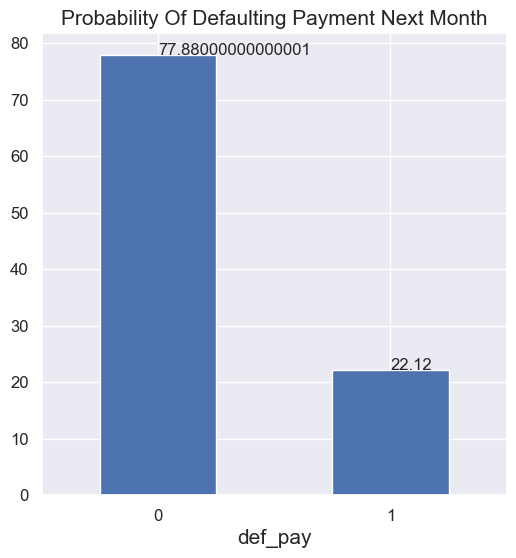

In [90]:
def_cnt = (defaulters.def_pay.value_counts(normalize=True)*100)
def_cnt.plot.bar(figsize=(6,6))
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.title("Probability Of Defaulting Payment Next Month", fontsize=15)
for x,y in zip([0,1],def_cnt):
    plt.text(x,y,y,fontsize=12)
plt.show()

So here defaulting pay next month means that about 78% of people won't pay the minimum amount required by the next month due.

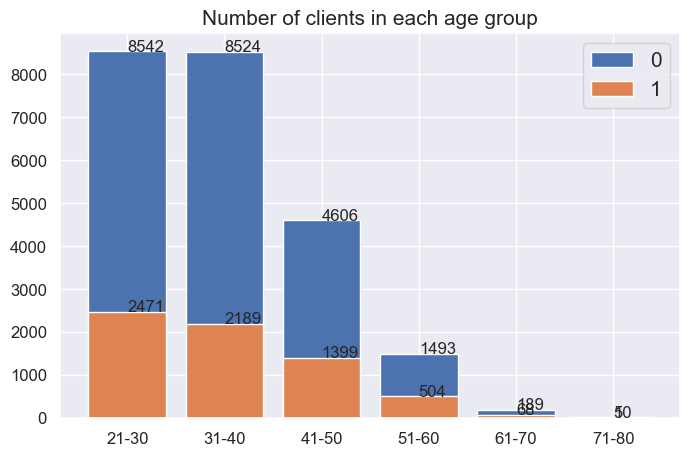

In [91]:
bins = [20,30,40,50,60,70,80]
names = ['21-30','31-40','41-50','51-60','61-70','71-80']
defaulters['AGE_BIN'] = pd.cut(x=defaulters.AGE, bins=bins, labels=names, right=True)

age_cnt = defaulters.AGE_BIN.value_counts()
age_0 = (defaulters.AGE_BIN[defaulters['def_pay'] == 0].value_counts())
age_1 = (defaulters.AGE_BIN[defaulters['def_pay'] == 1].value_counts())

plt.subplots(figsize=(8,5))
# sns.barplot(data=defaulters, x='AGE_BIN', y='LIMIT_BAL', hue='def_pay', ci=0)
plt.bar(age_0.index, age_0.values, label='0')
plt.bar(age_1.index, age_1.values, label='1')
for x,y in zip(names,age_0):
    plt.text(x,y,y,fontsize=12)
for x,y in zip(names,age_1):
    plt.text(x,y,y,fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Number of clients in each age group", fontsize=15)
plt.legend(loc='upper right', fontsize=15)
plt.show()

The number of defaulters are decreasing with increasing age. So we can say age is important

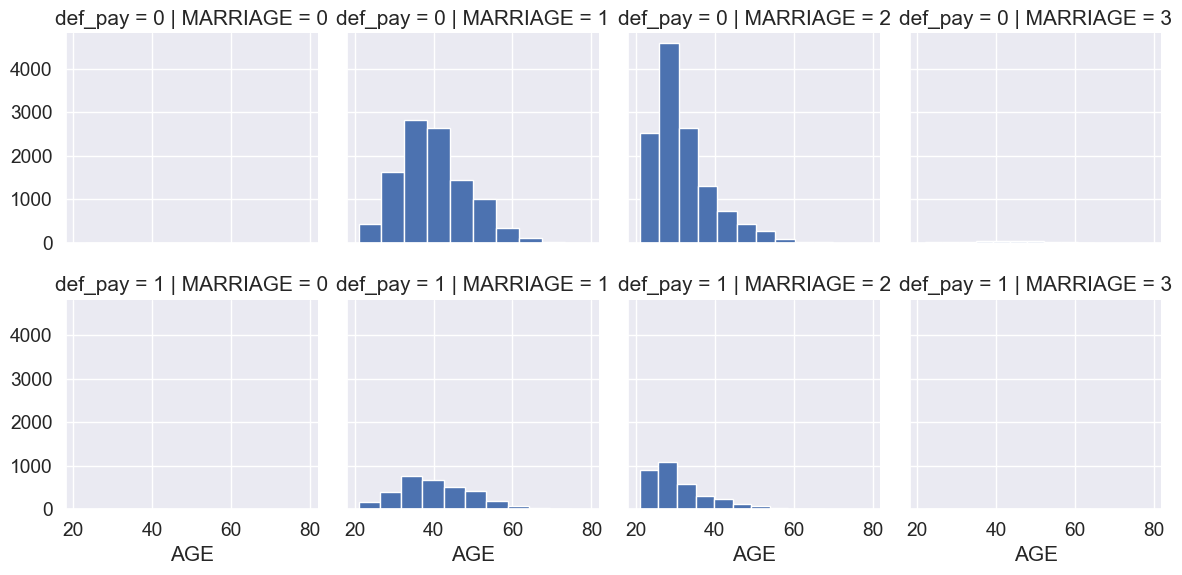

In [92]:
g = sns.FacetGrid(defaulters, row='def_pay', col='MARRIAGE')
g = g.map(plt.hist, 'AGE')
plt.show()

From above plot we can infer that married people between age bracket of 30 and 50 and unmarried clients of age 20-30 tend to default payment with unmarried clients higher probability to default payment. Hence we can include MARRIAGE feature of clients to find probability of defaulting the payment next month

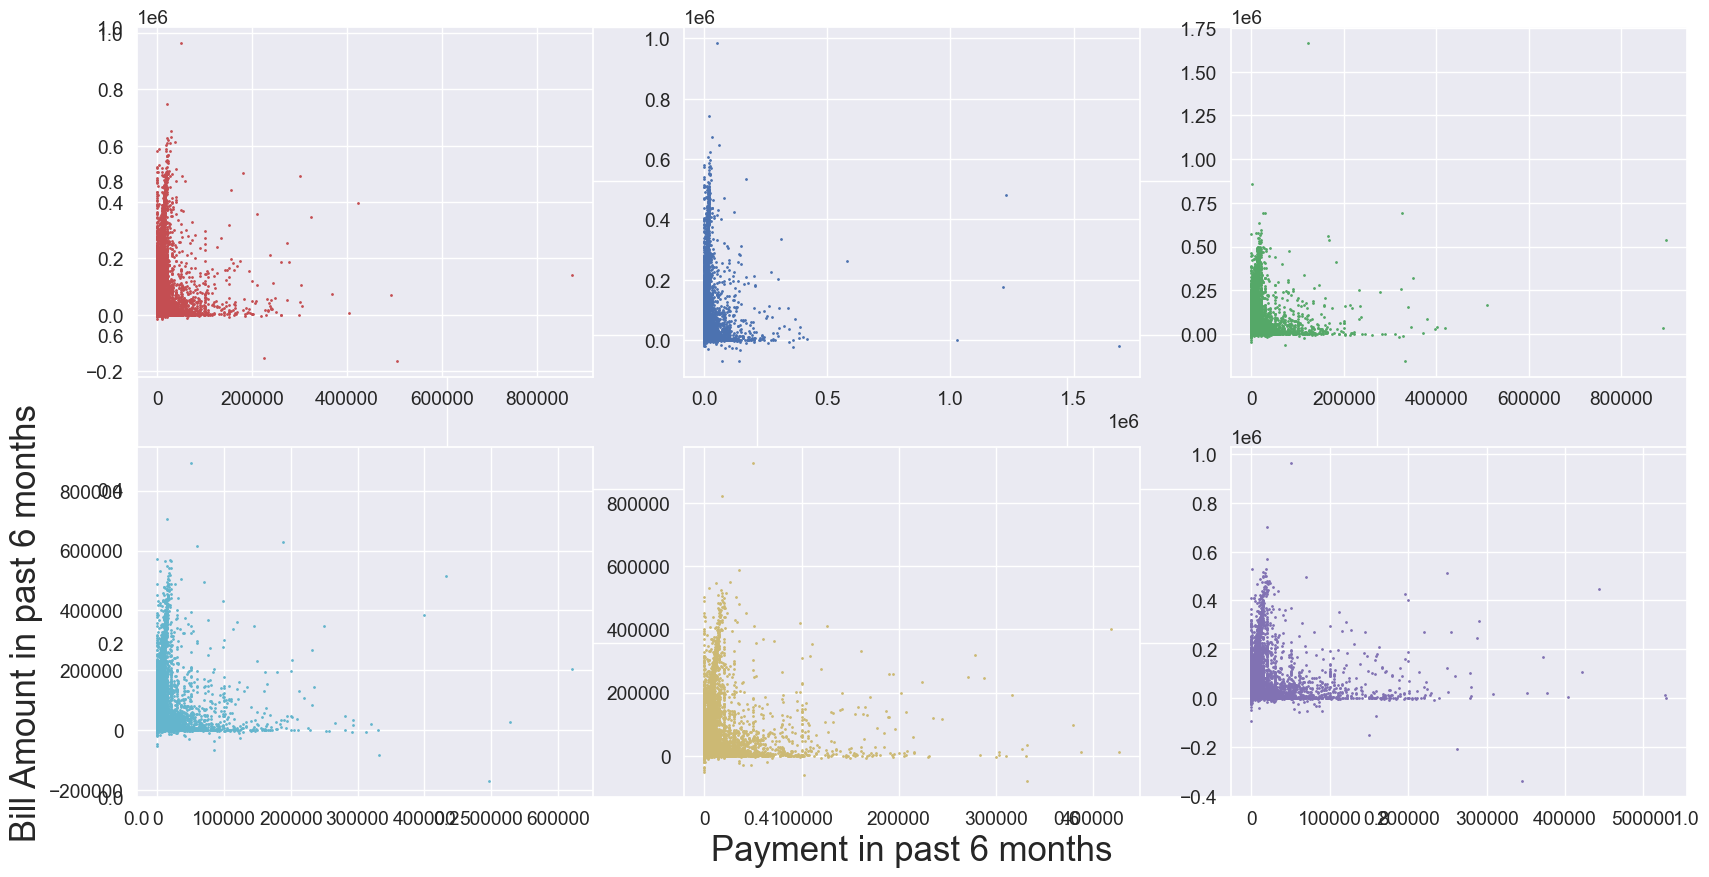

In [93]:
plt.subplots(figsize=(20,10))

plt.subplot(231)
plt.scatter(x=defaulters.PAY_AMT1, y=defaulters.BILL_AMT1, c='r', s=1)

plt.subplot(232)
plt.scatter(x=defaulters.PAY_AMT2, y=defaulters.BILL_AMT2, c='b', s=1)

plt.subplot(233)
plt.scatter(x=defaulters.PAY_AMT3, y=defaulters.BILL_AMT3, c='g', s=1)

plt.subplot(234)
plt.scatter(x=defaulters.PAY_AMT4, y=defaulters.BILL_AMT4, c='c', s=1)
plt.ylabel("Bill Amount in past 6 months", fontsize=25)

plt.subplot(235)
plt.scatter(x=defaulters.PAY_AMT5, y=defaulters.BILL_AMT5, c='y', s=1)
plt.xlabel("Payment in past 6 months", fontsize=25)

plt.subplot(236)
plt.scatter(x=defaulters.PAY_AMT6, y=defaulters.BILL_AMT6, c='m', s=1)

plt.show()

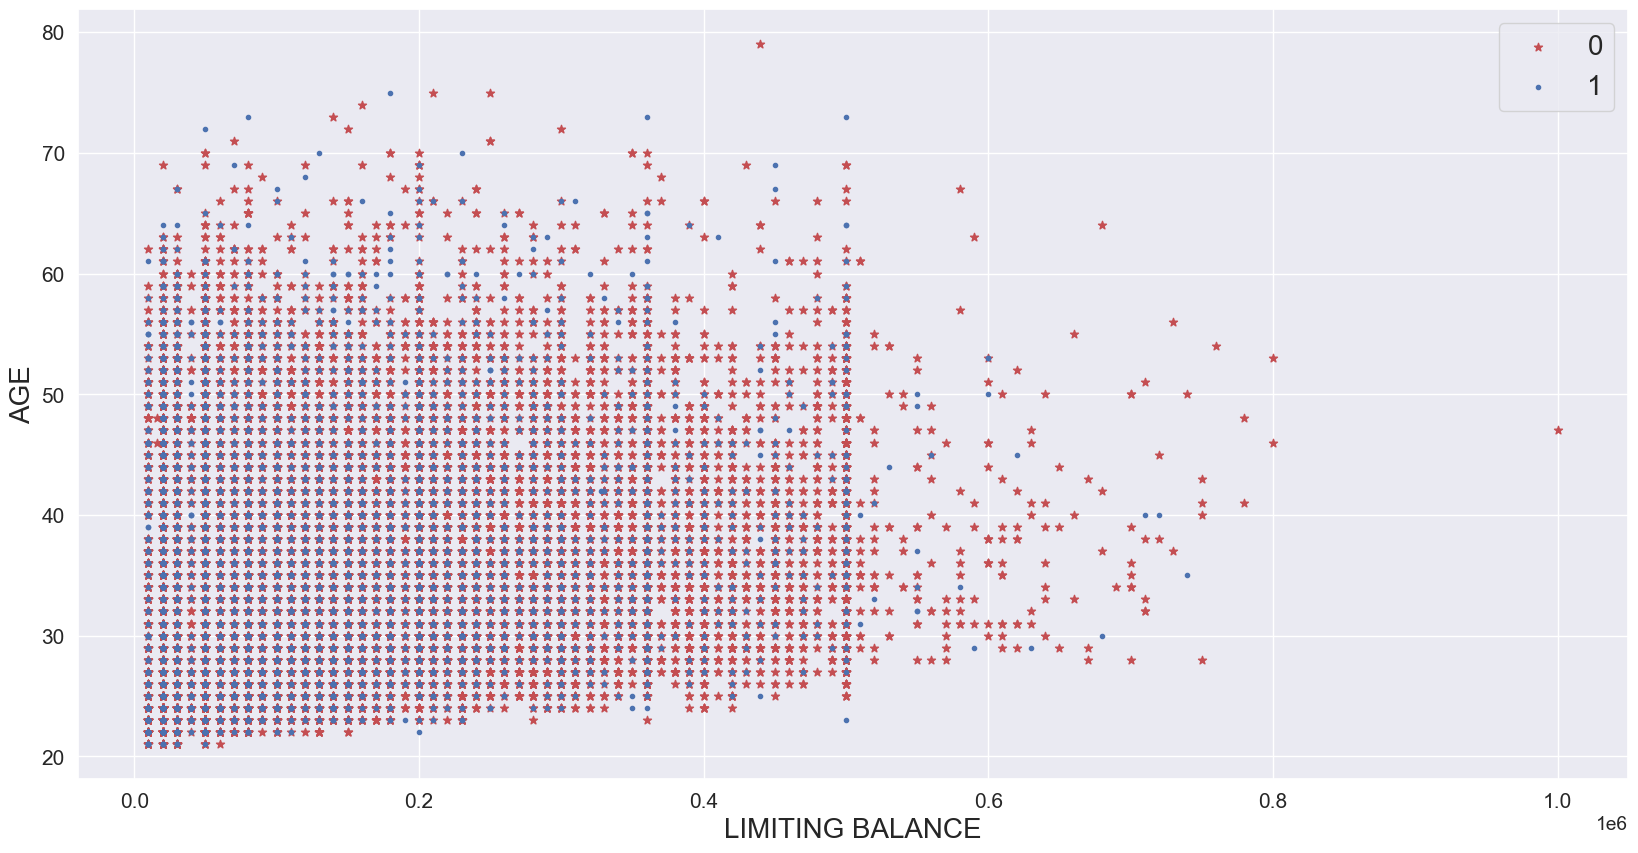

In [94]:
y1 = defaulters.AGE[defaulters["def_pay"] == 0]
y2 = defaulters.AGE[defaulters["def_pay"] == 1]
x1 = defaulters.LIMIT_BAL[defaulters["def_pay"] == 0]
x2 = defaulters.LIMIT_BAL[defaulters["def_pay"] == 1]

fig,ax = plt.subplots(figsize=(20,10))
plt.scatter(x1,y1, color="r", marker="*", label='0')
plt.scatter(x2,y2, color="b", marker=".", label='1')
plt.xlabel("LIMITING BALANCE", fontsize=20)
plt.ylabel("AGE", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='upper right', fontsize=20)
plt.show()

In [95]:
defaulters.dtypes

ID              int64
LIMIT_BAL     float64
SEX             int64
EDUCATION       int64
MARRIAGE        int64
AGE             int64
PAY_1           int64
PAY_2           int64
PAY_3           int64
PAY_4           int64
PAY_5           int64
PAY_6           int64
BILL_AMT1     float64
BILL_AMT2     float64
BILL_AMT3     float64
BILL_AMT4     float64
BILL_AMT5     float64
BILL_AMT6     float64
PAY_AMT1      float64
PAY_AMT2      float64
PAY_AMT3      float64
PAY_AMT4      float64
PAY_AMT5      float64
PAY_AMT6      float64
def_pay         int64
AGE_BIN      category
dtype: object

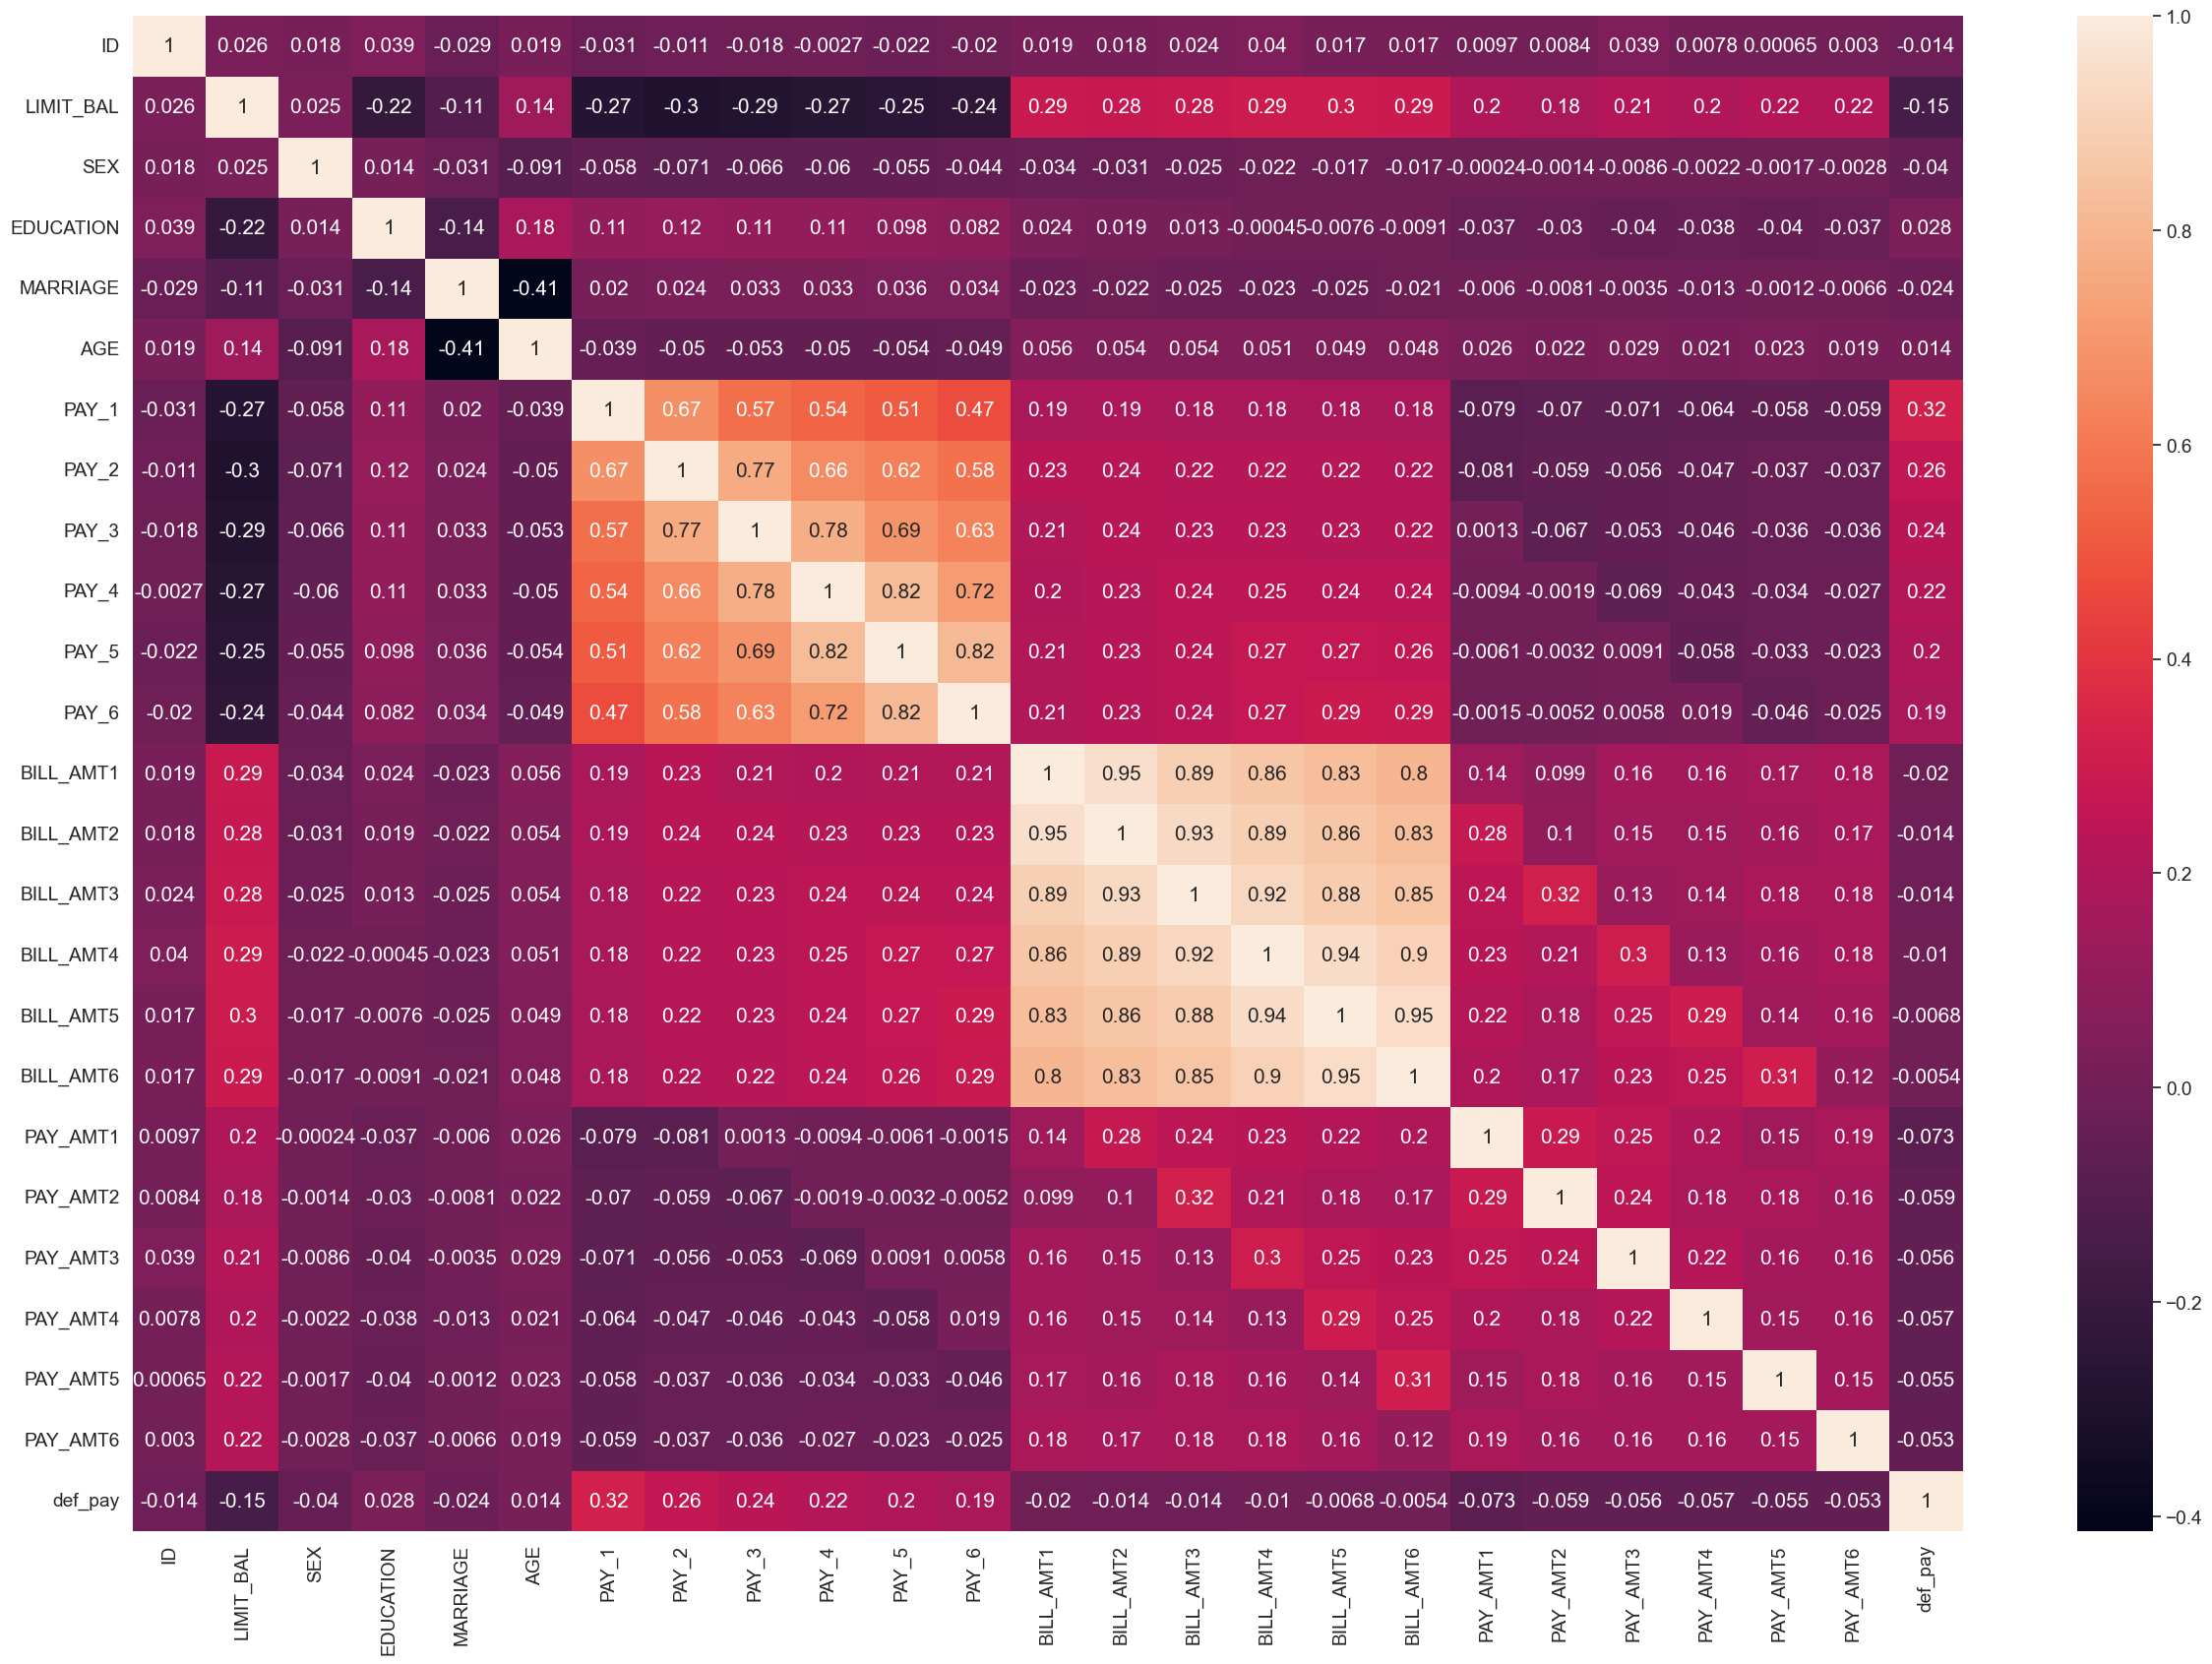

In [96]:
num_cols=defaulters.drop("AGE_BIN",axis=1)
plt.subplots(figsize=(30,20))
sns.heatmap(num_cols.corr(), annot=True)
plt.show()

In [97]:
defaulters=defaulters.drop("AGE_BIN",axis=1)

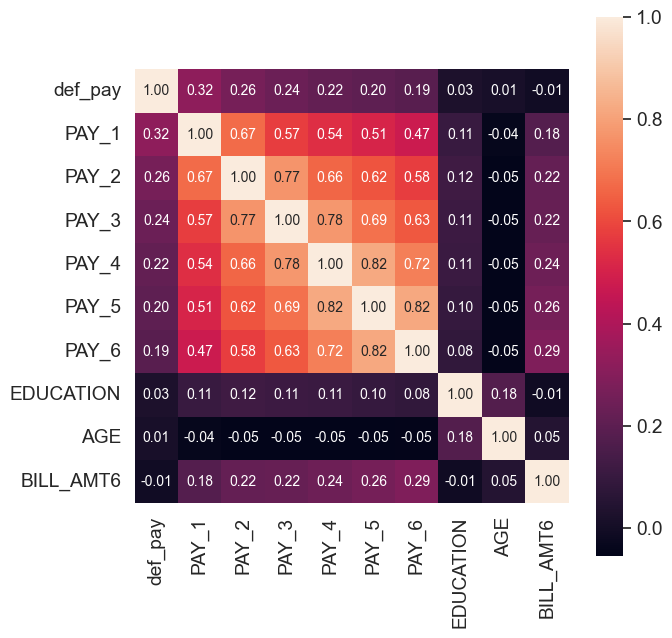

In [98]:
k = 10 #number of variables for heatmap
corrmat = defaulters.corr()
cols = corrmat.nlargest(k, 'def_pay')['def_pay'].index
cm = np.corrcoef(defaulters[cols].values.T)
sns.set(font_scale=1.25)
plt.subplots(figsize=(7,7))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Since the problem is a classic binary classification problem lets do Logistic Regression

Lets do our Training Data and Testing Data


In [99]:
df_X = defaulters.drop(['def_pay'], axis=1)
df_y = defaulters.def_pay

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=10)

model1 = LogisticRegression()
model1.fit(X_train, y_train)

y_pred = model1.predict(X_test)

print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))
print('\nAccuracy Score for model1: ', accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.78      0.88      5998
           1       0.00      0.00      0.00         2

    accuracy                           0.78      6000
   macro avg       0.50      0.39      0.44      6000
weighted avg       1.00      0.78      0.88      6000

[[4681 1317]
 [   2    0]]

Accuracy Score for model1:  0.7801666666666667


Noe lets try to build our model with only one pay_1, and the rest are dropped

In [100]:
df_X = defaulters.drop(['def_pay','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6'], axis=1)
df_y = defaulters.def_pay

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=10)

model3 = LogisticRegression()
model3.fit(X_train, y_train)

y_pred = model3.predict(X_test)

print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))
print('\nAccuracy Score for model3: ', accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.78      0.88      5998
           1       0.00      0.00      0.00         2

    accuracy                           0.78      6000
   macro avg       0.50      0.39      0.44      6000
weighted avg       1.00      0.78      0.88      6000

[[4681 1317]
 [   2    0]]

Accuracy Score for model3:  0.7801666666666667


Now, that is not much a difference, lets have only 1 for every dataset aspect column, and train our model


In [102]:
df_X = defaulters[['SEX','MARRIAGE','AGE','BILL_AMT1','EDUCATION','PAY_1']]
df_y = defaulters.def_pay

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.3, random_state=20)

model5 = RidgeClassifier()
model5.fit(X_train, y_train)

y_pred = model5.predict(X_test)
y_train_pred = model5.predict(X_train)

print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))
print('\nTest Accuracy Score for model5: ', accuracy_score(y_pred,y_test))
print('\nTrain Accuracy Score for model5: ', accuracy_score(y_train_pred,y_train))

              precision    recall  f1-score   support

           0       0.99      0.79      0.88      8694
           1       0.11      0.70      0.18       306

    accuracy                           0.79      9000
   macro avg       0.55      0.75      0.53      9000
weighted avg       0.96      0.79      0.86      9000

[[6910 1784]
 [  93  213]]

Test Accuracy Score for model5:  0.7914444444444444

Train Accuracy Score for model5:  0.7915238095238095


Marginal difference of just around 2%. Lets also check using Hypertuning parameters

In [49]:
from sklearn.model_selection import GridSearchCV


logistic_model = LogisticRegression()

param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(logistic_model, param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Print the classification report and confusion matrix
print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))

# Print the accuracy scores
print('\nTest Accuracy Score: ', accuracy_score(y_pred, y_test))
print('Train Accuracy Score: ', best_model.score(X_train, y_train))

Best Hyperparameters: {'C': 10, 'penalty': 'l2'}
              precision    recall  f1-score   support

           0       1.00      0.78      0.88      9000
           1       0.00      0.00      0.00         0

    accuracy                           0.78      9000
   macro avg       0.50      0.39      0.44      9000
weighted avg       1.00      0.78      0.88      9000

[[7003 1997]
 [   0    0]]

Test Accuracy Score:  0.7781111111111111
Train Accuracy Score:  0.7790952380952381


Not much a difference, now lets create our model pkl file and store it

In [103]:
import joblib

In [104]:
joblib.dump(model5, 'model.pkl')

['model.pkl']